In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def nonlin(x):
    return np.heaviside(x,1)*x



## b) simulate certain case

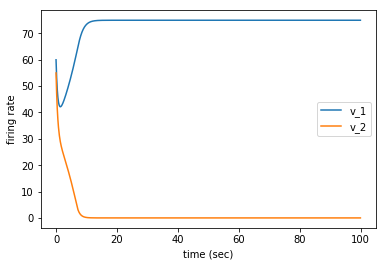

In [3]:
ws=0.2
wo=-0.9
M=np.array([[ws,wo],[wo,ws]])

tau=1
trange=[0,100]
dt=0.1

# input
h=np.array([60,55])


tvalues=np.arange(trange[0],trange[1],dt)
allv=np.zeros((len(tvalues),2))
allv[0]=h
for step in range(1,len(tvalues)):
    allv[step]=allv[step-1] + dt/tau*(-allv[step-1]+nonlin(h+np.dot(M,allv[step-1])))
    
plt.plot(tvalues,allv[:,0],label="v_1")
plt.plot(tvalues,allv[:,1],label="v_2")
plt.xlabel('time (sec)')
plt.ylabel('firing rate')
plt.legend()
plt.show()

# Problem 2:  Winner take all

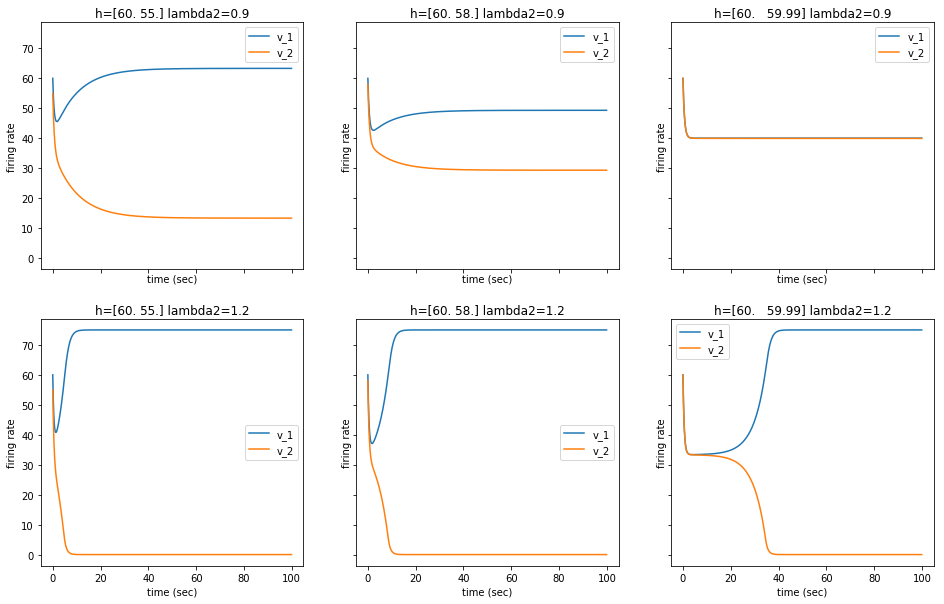

In [27]:
ws=0.2

tau=1
trange=[0,100]
dt=0.1

hvalues=np.array([[60,55],[60,58],[60,59.99]])
wovalues=[-0.7,-1]
fig,ax=plt.subplots(len(wovalues),len(hvalues),sharex=True,sharey=True)
fig.set_size_inches((16,10))
for hnum in range(len(hvalues)):
    h=hvalues[hnum]
    for wnum in range(len(wovalues)):
        wo=wovalues[wnum]
        M=np.array([[ws,wo],[wo,ws]])
        
        # simulate and plot
        tvalues=np.arange(trange[0],trange[1],dt)
        allv=np.zeros((len(tvalues),2))
        allv[0]=h
        for step in range(1,len(tvalues)):
            allv[step]=allv[step-1] + dt/tau*(-allv[step-1]+nonlin(h+np.dot(M,allv[step-1])))
        a=ax[wnum,hnum]
        a.plot(tvalues,allv[:,0],label="v_1")
        a.plot(tvalues,allv[:,1],label="v_2")
        a.set_xlabel('time (sec)')
        a.set_ylabel('firing rate')
        a.set_title('h='+str(h)+' lambda2='+str(np.round(ws-wo,1)))
        a.legend()
plt.show()

# Problem 3:  add noise

## First, plot a single case

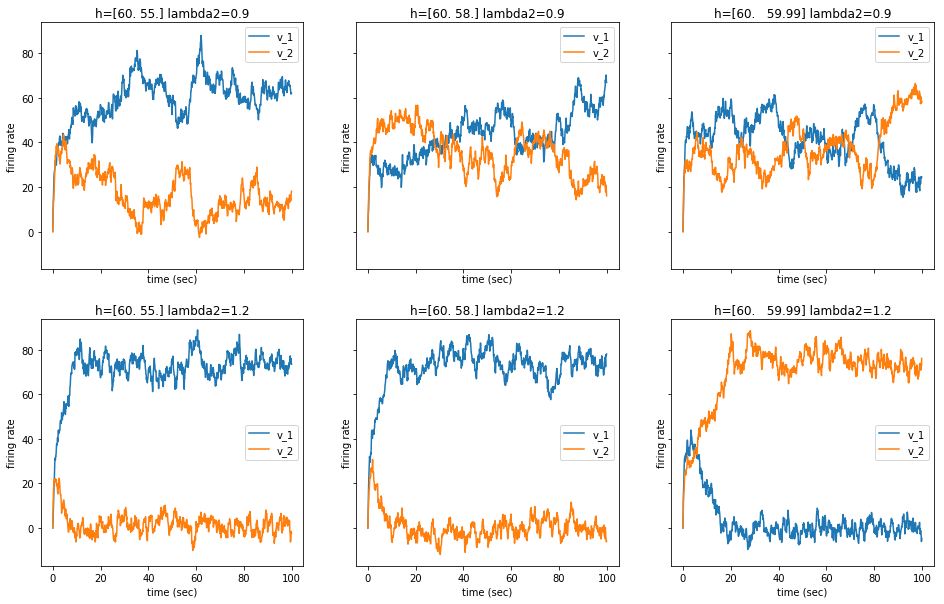

In [5]:
ws=0.2

tau=1
trange=[0,100]
dt=0.1

sigma=5

hvalues=np.array([[60,55],[60,58],[60,59.99]])
wovalues=[-0.7,-1]
fig,ax=plt.subplots(len(wovalues),len(hvalues),sharex=True,sharey=True)
fig.set_size_inches((16,10))
for hnum in range(len(hvalues)):
    h=hvalues[hnum]
    for wnum in range(len(wovalues)):
        wo=wovalues[wnum]
        M=np.array([[ws,wo],[wo,ws]])
        
        # simulate and plot
        tvalues=np.arange(trange[0],trange[1],dt)
        allv=np.zeros((len(tvalues),2))
        allv[0]=h*0
        for step in range(1,len(tvalues)):
            allv[step]=allv[step-1] + dt/tau*(-allv[step-1]+nonlin(h+np.dot(M,allv[step-1]))) + sigma*np.sqrt(dt)*np.random.randn(2)
        a=ax[wnum,hnum]
        a.plot(tvalues,allv[:,0],label="v_1")
        a.plot(tvalues,allv[:,1],label="v_2")
        a.set_xlabel('time (sec)')
        a.set_ylabel('firing rate')
        a.set_title('h='+str(h)+' lambda2='+str(np.round(ws-wo,1)))
        a.legend()
plt.show()

# Loop through, and calculate the number of times each one wins

In [65]:
ws=0.2

tau=1
trange=[0,100]
dt=0.1
tvalues=np.arange(trange[0],trange[1],dt)
    
sigma=5

hvalues=np.array([[60,55],[60,58],[60,59.99]])
numwins=np.zeros(len(hvalues))
wo=-1
M=np.array([[ws,wo],[wo,ws]])

numsims=1000

for hnum in range(len(hvalues)):    
    h=hvalues[hnum]
    for s in range(numsims):
        # simulate
        allv=np.zeros((len(tvalues),2))
        allv[0]=h
        for step in range(1,len(tvalues)):
            allv[step]=allv[step-1] + dt/tau*(-allv[step-1]+nonlin(h+np.dot(M,allv[step-1]))) + sigma*np.sqrt(dt)*np.random.randn(2)
        if allv[-1,0]>allv[-1,1]:
            numwins[hnum]+=1

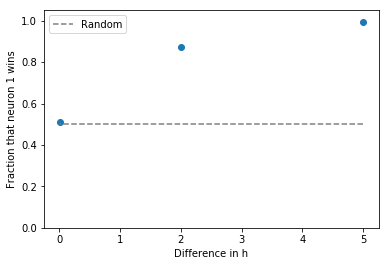

In [71]:
hdiffs=-np.ndarray.flatten(np.diff(hvalues))
plt.scatter(hdiffs,numwins/numsims)
plt.plot(hdiffs,np.ones(len(hdiffs))*0.5,'--',label='Random',c='gray')
plt.legend()
plt.xlabel('Difference in h')
plt.ylabel('Fraction that neuron 1 wins')
plt.ylim([0,1.05])
plt.show()